In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

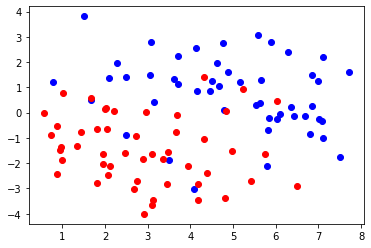

In [3]:
x = np.loadtxt("./data/logistic_x.txt")
y = np.loadtxt("./data/logistic_y.txt")

index_1 = np.where(y==1)
index_0 = np.where(y==-1)

figure = plt.figure()
plt.scatter(x[index_1][:,0], x[index_1][:,1], c='b')
plt.scatter(x[index_0][:,0], x[index_0][:,1], c='r')

In [4]:
x.shape, y.shape

((99, 2), (99,))

In [5]:
df_x = x.copy()
df_x = np.hstack([np.ones((x.shape[0],1)), df_x])
df_x

array([[ 1.        ,  1.3432504 , -1.3311479 ],
       [ 1.        ,  1.8205529 , -0.6346681 ],
       [ 1.        ,  0.98632067, -1.8885762 ],
       [ 1.        ,  1.9443734 , -1.635452  ],
       [ 1.        ,  0.97673352, -1.3533151 ],
       [ 1.        ,  1.9458584 , -2.0443278 ],
       [ 1.        ,  2.1075153 , -2.1256684 ],
       [ 1.        ,  2.070373  , -2.4634101 ],
       [ 1.        ,  0.86864964, -2.4119348 ],
       [ 1.        ,  1.8006594 , -2.7739689 ],
       [ 1.        ,  3.1283787 , -3.4452432 ],
       [ 1.        ,  3.0947429 , -3.6446145 ],
       [ 1.        ,  2.9086652 , -4.0065037 ],
       [ 1.        ,  2.6770338 , -3.0198592 ],
       [ 1.        ,  2.7458671 , -2.7100561 ],
       [ 1.        ,  4.1714647 , -3.4622482 ],
       [ 1.        ,  3.931322  , -2.1099044 ],
       [ 1.        ,  4.378687  , -2.3804743 ],
       [ 1.        ,  4.8016565 , -3.3803344 ],
       [ 1.        ,  4.166105  , -2.8138844 ],
       [ 1.        ,  2.4670141 , -1.610

In [11]:
all_thetas = []
theta = np.zeros((df_x.shape[1]))
tol = 1e9
n_iter = 0
while tol > 1e-6:
# while n_iter==0:
    zs = y * df_x.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    nabla = np.mean((gzs - 1) * y * df_x.T, axis=1)
    hessian = np.zeros((df_x.shape[1], df_x.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[1]):
            hessian[i][j] = np.mean(gzs * (1-gzs) * df_x[:, i] * df_x[:, j])

    delta = np.linalg.inv(hessian).dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iter += 1
    tol = np.sum(np.abs(theta - old_theta))

print("converged after %d times" % n_iter)

converged after 7 times


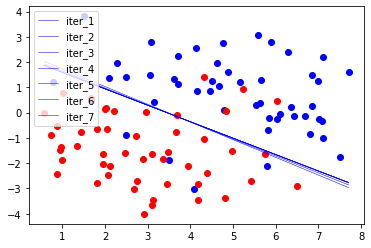

In [16]:
fig = plt.figure()
plt.scatter(x[index_1][:,0], x[index_1][:,1], c='b')
plt.scatter(x[index_0][:,0], x[index_0][:,1], c='r')

xs = np.array([np.min(df_x[:, 1]), np.max(df_x[:, 1])])
for index, thetas in enumerate(all_thetas):
    ys = (thetas[0] + thetas[1] * xs) / (-thetas[2])
    plt.plot(xs, ys, label="iter_{}".format(index+1), lw=0.5)
plt.legend(loc="upper left")